# Loan Data Capstone Project

## Objective: Determine and examine factors that affected the ratio of vehicle loan defaulters. Also, use the findings to create a model to predict the potential defaulters .

DESCRIPTION:
Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.


Problem Statement: Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates.
The need for a better credit risk scoring model is also raised by these institutions. 
This warrants a study to estimate the determinants of vehicle loan default. There is 1 dataset data that have 41 attributes. You are required to determine and examine factors that affected the ratio of vehicle loan defaulters. Also, use the findings to create a model to predict the potential defaulters.


# Task 1 Importing Data, Understanding and Inspecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style = "darkgrid")
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

•Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.

In [2]:
ld= pd.read_excel("LoanData.xlsx")

In [3]:
ld

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Age,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,41,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
1,490397,56574,68895,85.00,19,15685,86,1873,1985-09-07,37,...,0,0,13836,0,28,0,0yrs 3mon,4yrs 2mon,0,0
2,570221,59713,70064,86.35,34,20520,45,1043,1983-07-19,39,...,0,0,23848,0,23,0,0yrs 8mon,13yrs 0mon,7,0
3,629147,79079,115000,69.57,5,20470,86,3352,1988-12-30,33,...,0,0,9707,0,23,0,0yrs 5mon,2yrs 5mon,5,0
4,604477,64069,76542,86.10,17,20335,86,3241,1992-09-10,30,...,0,0,5198,0,22,0,0yrs 2mon,1yrs 5mon,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,584530,43939,79203,59.34,103,24632,86,7246,1992-04-05,30,...,0,0,3737,0,0,0,3yrs 8mon,3yrs 8mon,0,0
233150,446733,47349,62546,79.94,19,22694,45,1815,1980-11-10,42,...,0,0,1840,0,0,1,1yrs 6mon,1yrs 6mon,0,0
233151,532224,69659,85300,83.82,135,23550,86,1631,1976-08-15,46,...,0,0,0,0,0,0,0yrs 10mon,0yrs 10mon,0,0
233152,421689,47349,65502,74.81,202,23389,86,728,1970-01-01,52,...,0,0,0,0,0,1,1yrs 11mon,1yrs 11mon,0,0


In [4]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Age                                  233154 non-null  int64         
 

In [5]:
ld.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,State_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,38.094122,7.262243,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,9.806274,4.482230,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,22.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,30.000000,4.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,36.000000,6.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,45.000000,10.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,73.000000,22.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
ld.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Age                                       0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                 

In [7]:
ld=ld.dropna()

In [8]:
ld.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Age                                    0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCT

In [9]:
ld['Employment.Type'].unique()

array(['Self employed', 'Salaried'], dtype=object)

In [10]:
ld.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
233149    False
233150    False
233151    False
233152    False
233153    False
Length: 225493, dtype: bool

In [11]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             225493 non-null  int64         
 1   disbursed_amount                     225493 non-null  int64         
 2   asset_cost                           225493 non-null  int64         
 3   ltv                                  225493 non-null  float64       
 4   branch_id                            225493 non-null  int64         
 5   supplier_id                          225493 non-null  int64         
 6   manufacturer_id                      225493 non-null  int64         
 7   Current_pincode_ID                   225493 non-null  int64         
 8   Date.of.Birth                        225493 non-null  datetime64[ns]
 9   Age                                  225493 non-null  int64         
 

## Understanding of the parameters and what is Important to look into:
-- Primary Accounts are always bigger account loand than Secondary accounts

-- Primanry no. of accounts are the number of Loans taken by the customer

-- Pr. Act. Acnt are the one which are active amongst the total number of acounts

-- pr. overdue Acnt are the the acounts where the customer was unable to pay the amount , or in other words we can call it bounce account, It is better if the numbers are in zero. More Overdues leads to Defaulters.

-- Pr. curr. Balnce is the Amount in the acount 

-- Pr. Sanctioned Amount is the the amount given the by the bank to the customer

-- Pr. Disbursed amnt is the amount which is given by the Bank to the customer after all the deduction of the taxes

-- Sec No. Acnt are the small loans taken by the customers like for Bikes, Laptops and etc.

-- New acnts in last 6 months is the number of accounts // Loans taken by the customer

-- Avg Acnt Age: it the age of the loan since the time of applying by the customer

-- Credit History length is the Score of the Loan paying customers

-- No. of Inquires are the number of times the Customer has applied for the Loan in other banks.


If the Overdues are more, Then it can lead to Defaulter.If the Customer has 1 more overdues, bank does not give them loan, not only overdues are Looked after but also their Salary, Account balance which is in the Bank, their Past Credit History, And the other primary and Secondary Account Overdues. So Hence, Age and employment type does not affect the loan default and non default factor. 


In [12]:
ld['Employment.Type'].unique()

array(['Self employed', 'Salaried'], dtype=object)

In [13]:
ld['Age'].unique()

array([41, 37, 39, 33, 30, 32, 28, 43, 42, 34, 36, 27, 45, 31, 55, 49, 29,
       48, 47, 35, 56, 40, 46, 38, 44, 59, 50, 26, 57, 58, 51, 25, 65, 62,
       60, 52, 53, 61, 54, 66, 63, 64, 67, 68, 24], dtype=int64)

In [14]:
ld['loan_default'].unique()

array([0, 1], dtype=int64)

In [15]:
ld['loan_default'].value_counts()


0    176526
1     48967
Name: loan_default, dtype: int64

In [16]:
ld['Age'].value_counts()


27    10428
28    10368
30    10270
32    10014
26     9972
29     9906
31     9262
34     9137
33     8787
35     8578
36     8309
37     7811
38     7410
39     7074
40     6947
25     6773
42     6754
41     6104
44     5836
47     5558
46     5543
43     5534
45     5261
48     4603
49     4419
50     4331
52     4031
51     3681
53     3113
54     3057
55     2511
57     2372
56     2239
58     1751
59     1550
60     1465
62     1223
61     1168
63      805
64      613
65      409
66      329
67      167
68       19
24        1
Name: Age, dtype: int64

In [17]:
ld['Employment.Type'].value_counts()


Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [18]:
ld.groupby(['Employment.Type','loan_default']).size()
# Checking the Counts of deafulters and its employment type

Employment.Type  loan_default
Salaried         0               77948
                 1               19910
Self employed    0               98578
                 1               29057
dtype: int64

In [19]:
ld.groupby(['Age','loan_default','Employment.Type']).size()


Age  loan_default  Employment.Type
24   0             Salaried              1
25   0             Salaried           2724
                   Self employed      2280
     1             Salaried            945
                   Self employed       824
                                      ... 
67   1             Self employed        18
68   0             Salaried              4
                   Self employed        11
     1             Salaried              1
                   Self employed         3
Length: 177, dtype: int64

# Plotting distribution of classes of target variable:

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


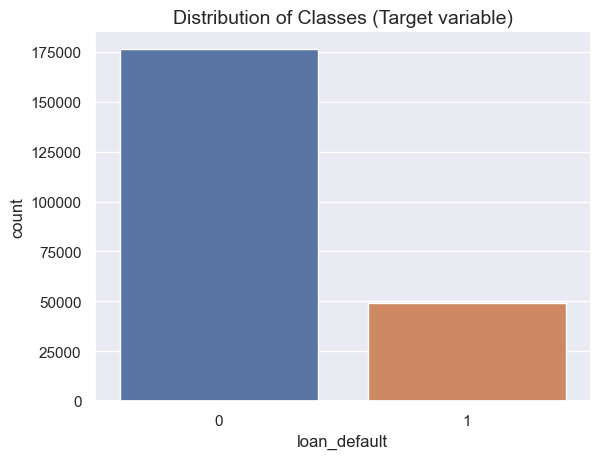

In [20]:
 print('Distribution of the loan_default in the dataset')
print(ld['loan_default'].value_counts()/len(ld))

sns.countplot('loan_default', data=ld)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()


In [21]:
# Over sampling to resolve imbalance
df = ld.sample(frac=1)
loan_default_1 = ld.loc[df['loan_default'] == 1]
loan_default_0 = ld.loc[df['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])


In [22]:
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Age,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
30439,437519,51303,89299,58.23,136,17049,48,3693,1992-11-18,30,...,0,0,0,0,1,0,1yrs 2mon,2yrs 1mon,0,0
79423,603396,37439,73889,51.43,2,18450,51,1742,1991-01-12,31,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
223244,590537,56213,72737,79.74,3,14764,86,44,1970-02-04,52,...,187708,187708,4419,0,0,1,4yrs 5mon,13yrs 8mon,0,1
220441,634242,72317,110000,67.73,202,23319,49,776,1995-01-01,27,...,0,0,0,0,0,0,0yrs 6mon,0yrs 6mon,0,1
146355,427546,61947,89900,71.19,48,23331,48,6322,1975-06-04,47,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


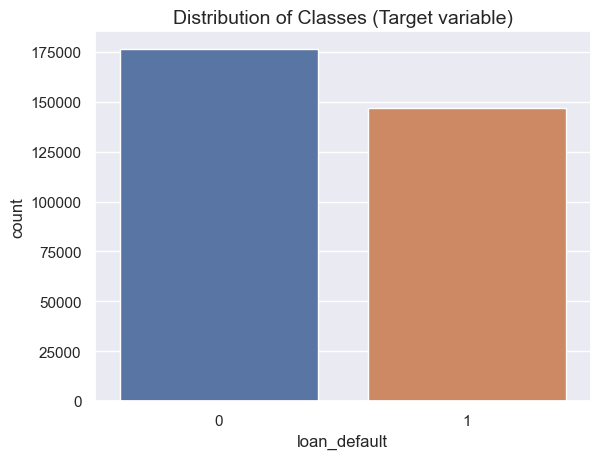

In [23]:
print('Distribution of the loan_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot('loan_default', data=new_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [24]:
# Size of dataset after over sampling
new_df.shape

(323427, 42)

In [25]:
# Distribution of Cns Score

new_df.groupby('PERFORM_CNS.SCORE.DESCRIPTION').agg({'PERFORM_CNS.SCORE':[np.min, np.max]}).sort_values(('PERFORM_CNS.SCORE', 'amin'))



PERFORM_CNS.SCORE     
                                                                amin amax
PERFORM_CNS.SCORE.DESCRIPTION                                            
No Bureau History Available                                        0    0
Not Scored: More than 50 active Accounts found                    11   11
Not Scored: Only a Guarantor                                      14   14
Not Scored: Sufficient History Not Available                      15   15
Not Scored: No Activity seen on the customer (I...                16   16
Not Scored: Not Enough Info available on the cu...                17   17
Not Scored: No Updates available in last 36 months                18   18
M-Very High Risk                                                 300  300
L-Very High Risk                                                 301  350
K-High Risk                                                      351  520
J-High Risk                                                      521  570
I-Medium Risk                                                    571  600
H-Medium Risk                                                    601  630
G-Low Risk                                                       631  650
F-Low Risk                                                       651  680
E-Low Risk                                                       681  705
D-Very Low Risk                                                  706  735
C-Very Low Risk                                                  736  760
B-Very Low Risk                                                  761  805
A-Very Low Risk                                                  806  890

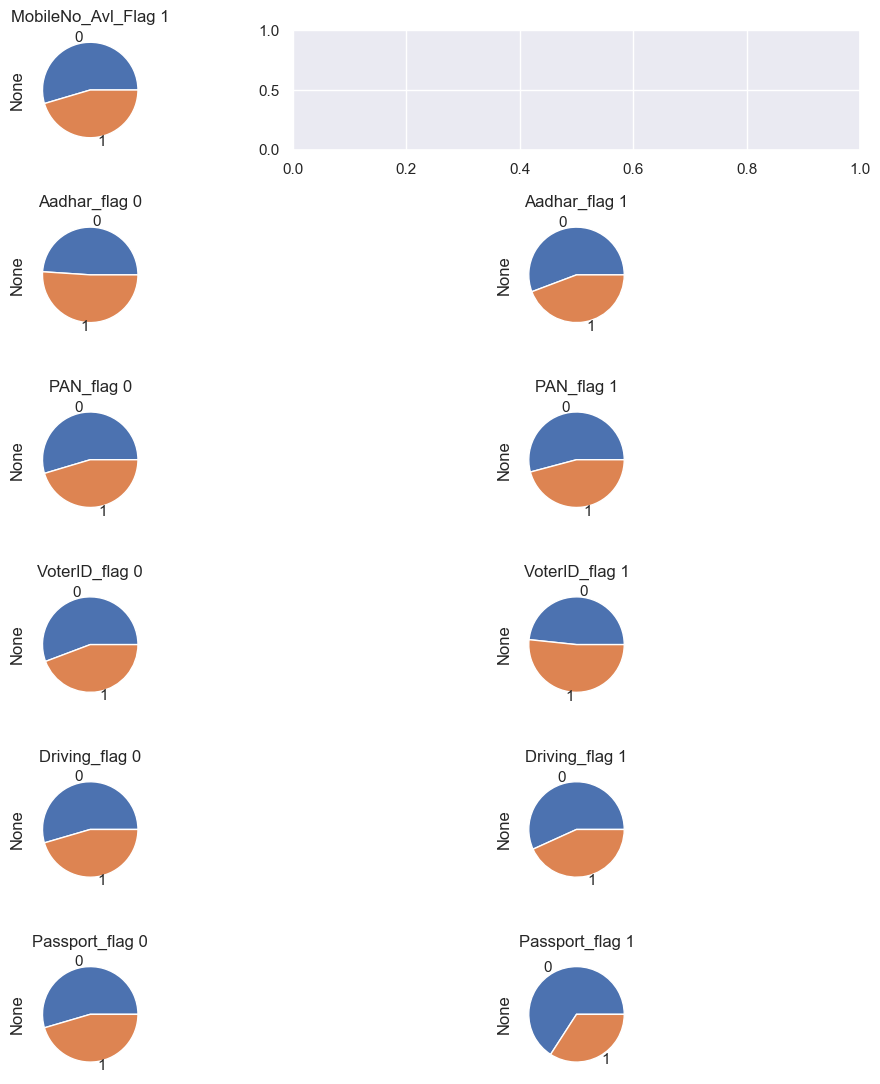

In [26]:
# Distribution of the IDs
flags = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
fig, axs = plt.subplots(len(flags), 2, figsize=(11, 11))

for _i, flag in enumerate(flags):
    for i, (vals, group) in enumerate(new_df.groupby([flag])):
        group.groupby(['loan_default']).size().plot.pie(ax=axs[_i][i])
        axs[_i][i].set_title(str(flag)+' '+str(vals))
plt.tight_layout()

In [27]:
def binning_by_depth_factor(df_column, factor):
    divs, max_da, min_da= round(np.sqrt(len(df_column))/factor), df_column.max(), df_column.min()
    step = (max_da - min_da)/divs
    return (df_column/step).astype(int)*divs



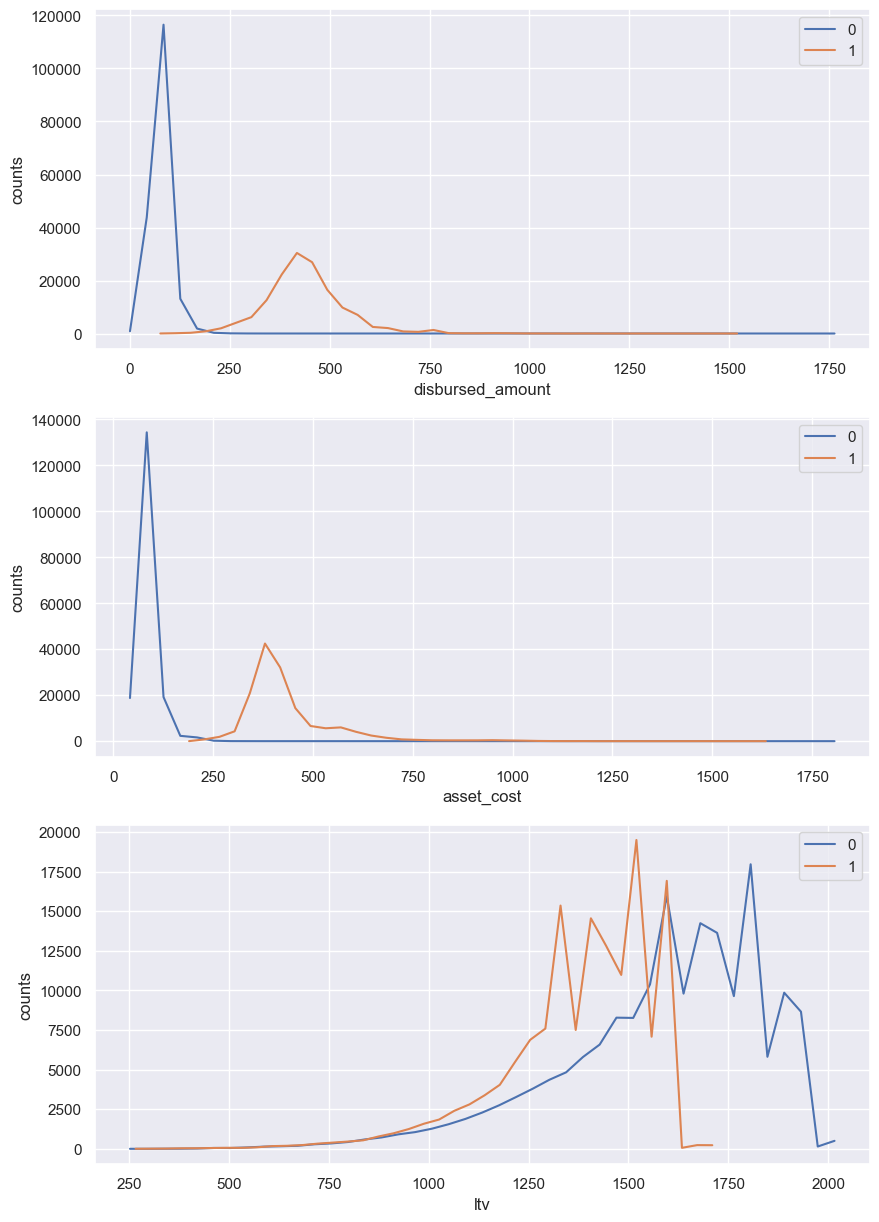

In [28]:
cols = ['disbursed_amount', 'asset_cost', 'ltv']
fig, axs = plt.subplots(len(cols), figsize=(10, 5*len(cols)))

for j, col in enumerate(cols):
    for i, (val, group) in enumerate(new_df.groupby('loan_default')): 
        column = binning_by_depth_factor(group[col], 10) 
        column.value_counts().to_frame('counts').reset_index().sort_values('index').plot(x='index', y='counts', label=val, ax=axs[j])
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('counts')


Disbursed amount and asset cost in both both classes showing gaussian distribution but with different distribution frequencies.

This shows that the defaulters are defaulting mostly in lesser amounts of loan and for lesser asset costs.

Additionally as expected, lower LTV value customers are  defaulters.

In [29]:
def removeOutlier(dataSet, feature):    
    q1=dataSet[feature].quantile(0.25)
    q3=dataSet[feature].quantile(0.75)
    IQR=q3-q1
    lowerLimit = q1 - 1.5 * IQR
    UpperLimit = q3 + 1.5 * IQR 
    dataSet = dataSet[dataSet[feature]< UpperLimit]
    dataSet = dataSet[dataSet[feature]> lowerLimit]
    return dataSet

def modelEvaluation(model, X_test, y_train,y_test, y_pred,cols=None):
    print("Accurancy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("F1 Score:: {:.3f} ".format(f1_score(y_test, y_pred)))
    print("Balanced Accurancy Score:: {:.3f} ".format(balanced_accuracy_score(y_test, y_pred)))
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    prediction_probabilities = model.predict_proba(X_test[cols])[:,1]
    fpr , tpr , thresholds = roc_curve(y_test,prediction_probabilities)
    ax.plot(fpr,tpr,label = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE and AREA UNDER CURVE")
    ax.set_facecolor("k")
    
   

In [30]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323427 entries, 30439 to 117744
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             323427 non-null  int64         
 1   disbursed_amount                     323427 non-null  int64         
 2   asset_cost                           323427 non-null  int64         
 3   ltv                                  323427 non-null  float64       
 4   branch_id                            323427 non-null  int64         
 5   supplier_id                          323427 non-null  int64         
 6   manufacturer_id                      323427 non-null  int64         
 7   Current_pincode_ID                   323427 non-null  int64         
 8   Date.of.Birth                        323427 non-null  datetime64[ns]
 9   Age                                  323427 non-null  int64       

<AxesSubplot:>

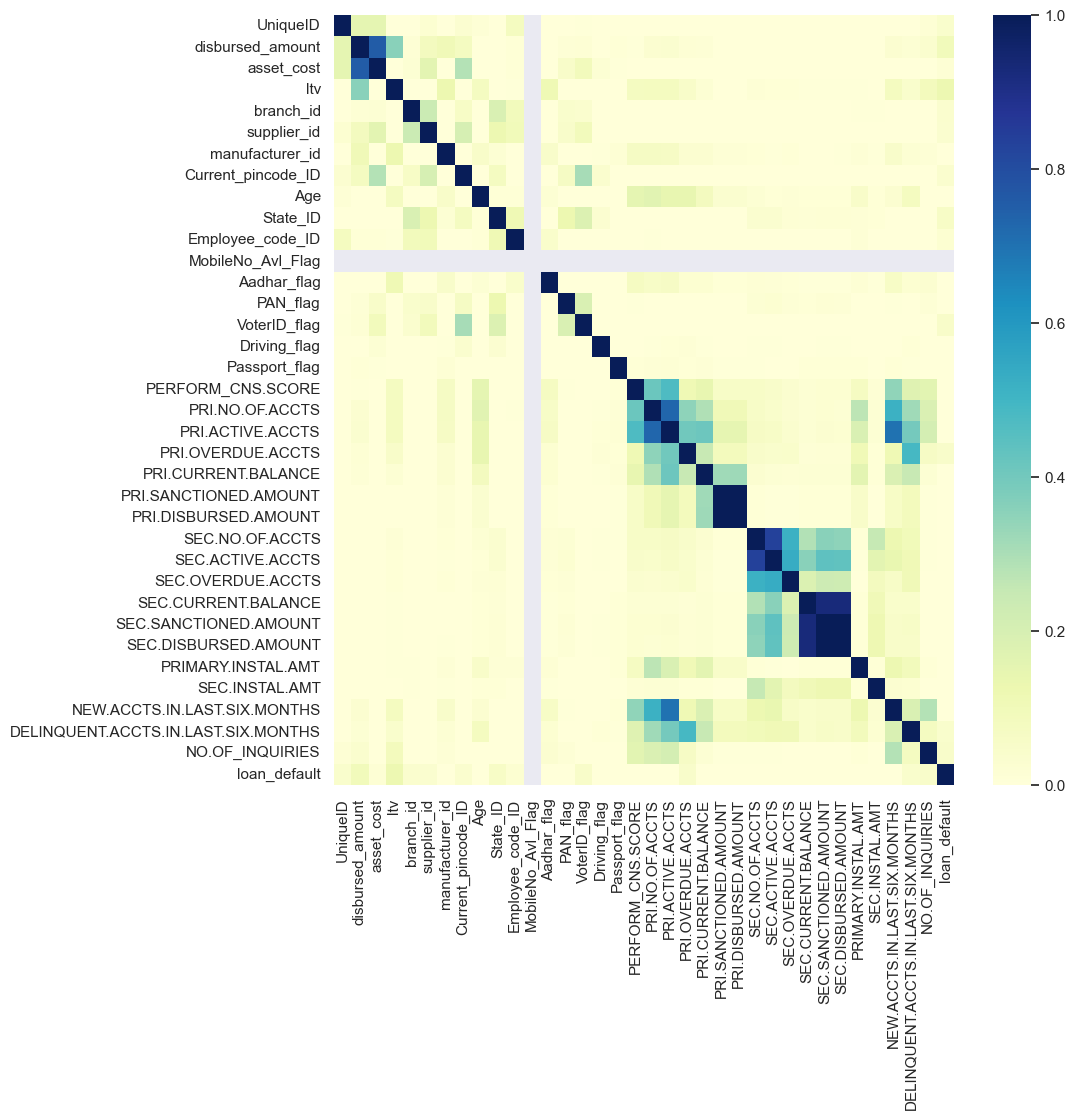

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(new_df.corr(), ax=ax, vmin=0, vmax=1, cmap="YlGnBu")


# Training Model

In [32]:
inp1=new_df.copy()


In [50]:
inp1.drop(["PERFORM_CNS.SCORE.DESCRIPTION"],axis=1, inplace=True)

In [51]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323427 entries, 30439 to 117744
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             323427 non-null  int64  
 1   disbursed_amount                     323427 non-null  int64  
 2   asset_cost                           323427 non-null  int64  
 3   ltv                                  323427 non-null  float64
 4   branch_id                            323427 non-null  int64  
 5   supplier_id                          323427 non-null  int64  
 6   manufacturer_id                      323427 non-null  int64  
 7   Current_pincode_ID                   323427 non-null  int64  
 8   Employment.Type                      323427 non-null  int64  
 9   State_ID                             323427 non-null  int64  
 10  Employee_code_ID                     323427 non-null  int64  
 11  MobileNo_

In [52]:
inp1['Employment.Type'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [53]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323427 entries, 30439 to 117744
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             323427 non-null  int64  
 1   disbursed_amount                     323427 non-null  int64  
 2   asset_cost                           323427 non-null  int64  
 3   ltv                                  323427 non-null  float64
 4   branch_id                            323427 non-null  int64  
 5   supplier_id                          323427 non-null  int64  
 6   manufacturer_id                      323427 non-null  int64  
 7   Current_pincode_ID                   323427 non-null  int64  
 8   Employment.Type                      323427 non-null  int64  
 9   State_ID                             323427 non-null  int64  
 10  Employee_code_ID                     323427 non-null  int64  
 11  MobileNo_

In [54]:
inp1['Employment.Type'].unique()

array([0, 1], dtype=int64)

In [55]:
X = inp1.drop('loan_default', axis=1)
y = inp1['loan_default'].copy()

Split train and test data with 70:30 ratio



In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)


In [57]:
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (226398, 35)
X_test size:  (97029, 35)


# Build and evaluate models


Define evaluation function which calculates following metrics:

-- Confusion matrix
-- Accuracy score
-- Precision
-- Recall
-- F1 score
-- ROC AUC score.

In [58]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

# Scaling data before model training and testing


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Logistic Regression

In [60]:
# Find best parameters using grid search
lr = LogisticRegression()

In [63]:
import sklearn.metrics as metrics
lr = LogisticRegression(C=5.0)

In [64]:
params = {'C':[0.1, 0.5, 1, 5]}
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[37869 15443]
 [23917 19800]]
Accuracy:  0.5943480815014068
Precision:  0.5618136934994183
Recall:  0.45291305441818974
f1 score:  0.5015197568389058
roc_auc_score:  0.5816204677853253


2. Decision Trees


In [65]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[36773 16539]
 [22970 20747]]
Accuracy:  0.5928124581310742
Precision:  0.5564286863702194
Recall:  0.47457510808152437
f1 score:  0.512252632618545
roc_auc_score:  0.5821723829723349


3. Random Forest

In [67]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[48052  5260]
 [ 3117 40600]]
Accuracy:  0.9136649867565367
Precision:  0.8853030963802878
Recall:  0.9287005055241668
f1 score:  0.906482690869308
roc_auc_score:  0.9150180198689262


# Conclusion

In The Above problem statement, we have observed that Random Forest gives good accuracy score as compared to others.

In [69]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 117.5/117.5 kB ? eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB ? eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=4c6b44d9cd02220aaaaf4819ae30f447f591c2bad641a6e3ea215dd1ac098606
  Stored in directory: c:\users\vishwadeep\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc


In [1]:
pip install nbconvert[webpdf]


     ---------------------------------------- 83.4/83.4 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 1.9 MB/s eta 0:00:00


In [5]:
jupyter nbconvert --to FORMAT notebook.ipynb

SyntaxError: invalid syntax (762129301.py, line 1)